In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # Add project root to Python path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import load_train_data, load_test_data, resumetable, plot_multiple_axes

In [2]:
train_df = load_train_data()
test_df = load_test_data()

In [3]:
train_df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [4]:
feature_table = resumetable(train_df)
feature_table

Data shape: (750000, 10)


,Data Type,Missing,Nunique,Feature Type
id,int64,0,750000,Ordinal
Temparature,int64,0,14,Ordinal
Humidity,int64,0,23,Ordinal
Moisture,int64,0,41,Ordinal
Nitrogen,int64,0,39,Ordinal
Potassium,int64,0,20,Ordinal
Phosphorous,int64,0,43,Ordinal
Soil Type,object,0,5,None
Crop Type,object,0,11,None
Fertilizer Name,object,0,7,None


In [5]:
null_sum_series = (train_df == -1).sum() # sum(): 기본적으로 세로줄에 대한 연산 
print(null_sum_series)

id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


In [6]:
target = train_df['Fertilizer Name']

<Axes: xlabel='Fertilizer Name', ylabel='count'>

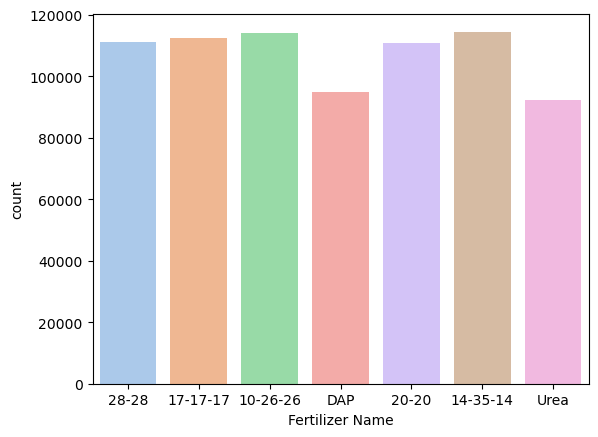

In [7]:
sns.countplot(x=target, hue=target, data=train_df, palette='pastel', legend=False)

In [8]:
ordinal_features = feature_table[feature_table['Feature Type'] == 'Ordinal'].index.tolist()

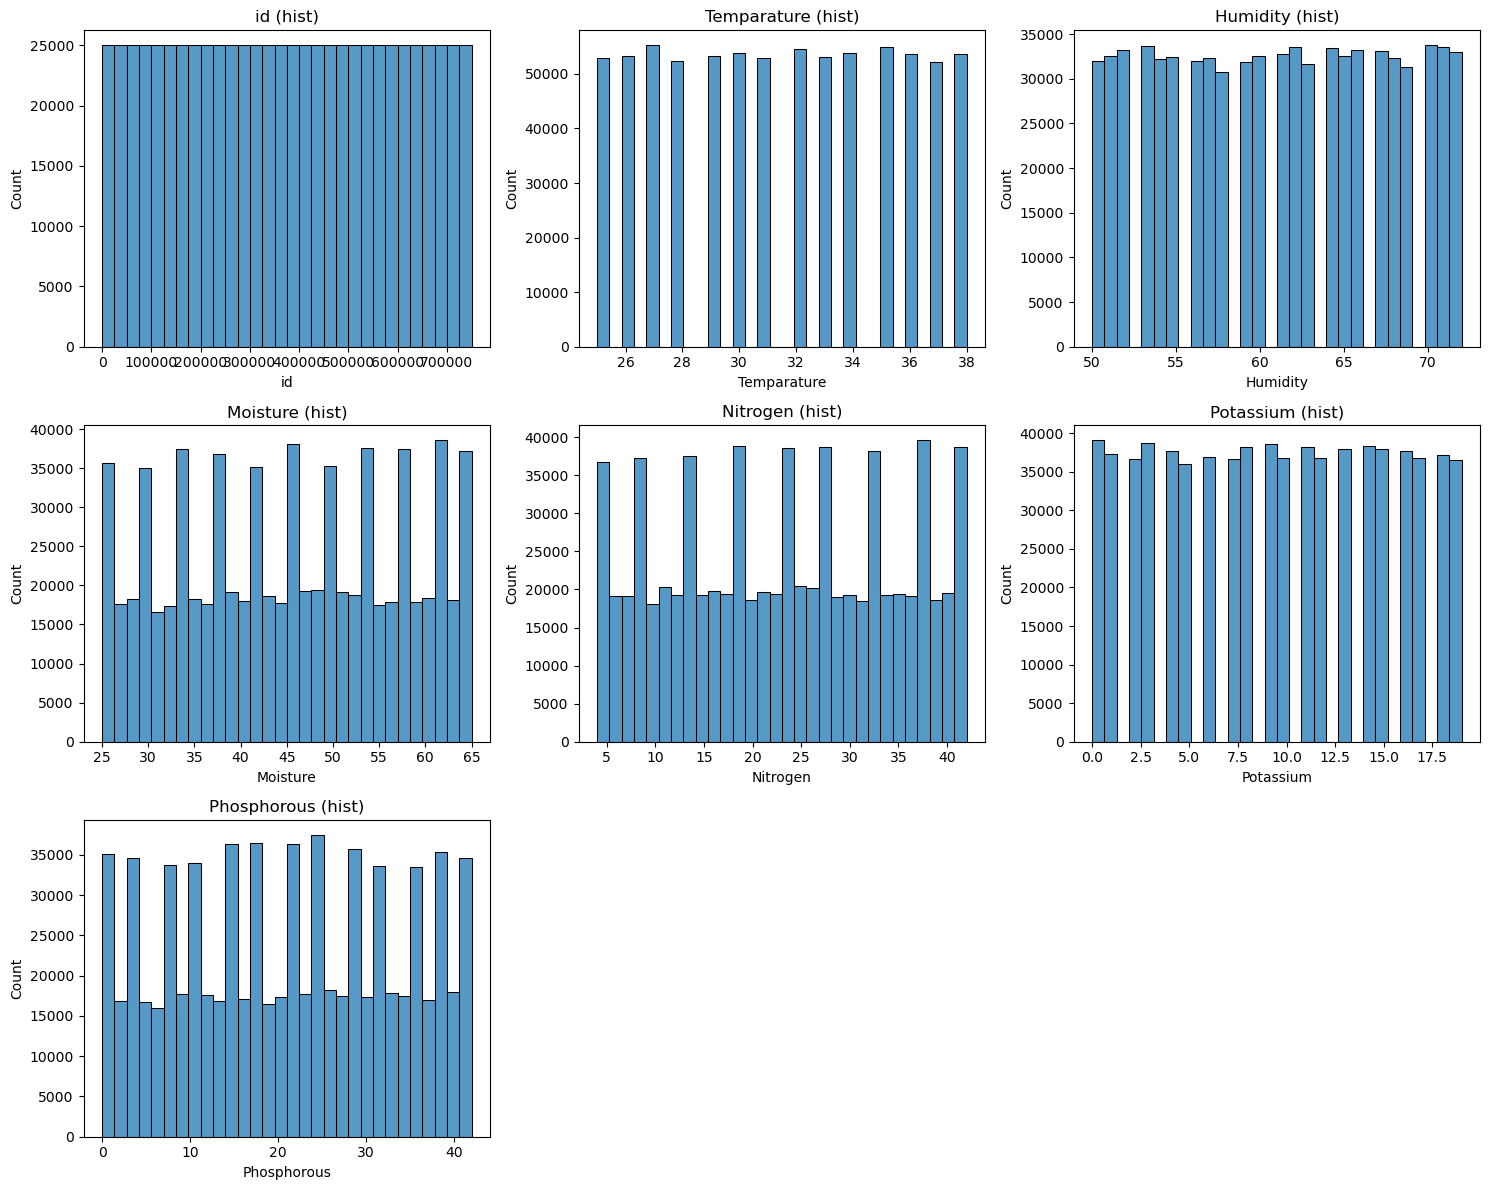

In [9]:
plot_multiple_axes(train_df, ordinal_features, plot_type='hist', target=target, n_cols=3, height=4)